<a href="https://colab.research.google.com/github/sunnypatel3/hello-workd/blob/main/Spreetail_forecast_separate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=21cfd9c9741e72a5fe7c22a968f40dc2b6cd87b9460dbf5ff19a59f391aa733c
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.0 MB/s 
     |████████████████████████████████| 9.8 MB 31.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# importing libraries for the excercise
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
import io
import statsmodels.api as sm

In [ ]:
#uploading and reading griven csv into colab
from google.colab import files
upload = files.upload()

Saving forecasting_interview_data.csv to forecasting_interview_data (2).csv


In [ ]:
# reading csv into pandas dataframe
df = pd.read_csv(io.BytesIO(upload['forecasting_interview_data.csv']))
print(df.head())

  snapshot_date product_category  product_id       date  units
0      2/6/2022    Home & Garden           9  1/27/2019      1
1      2/6/2022    Home & Garden           9   2/3/2019      0
2      2/6/2022    Home & Garden           9  2/10/2019      0
3      2/6/2022    Home & Garden           9  2/17/2019      2
4      2/6/2022    Home & Garden           9  2/24/2019      1


In [ ]:
# printing useful stats and summary
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   snapshot_date     394 non-null    object
 1   product_category  394 non-null    object
 2   product_id        394 non-null    int64 
 3   date              394 non-null    object
 4   units             394 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.5+ KB
None
snapshot_date       0
product_category    0
product_id          0
date                0
units               0
dtype: int64
          product_id       units
count     394.000000  394.000000
mean    90979.527919   23.720812
std     89145.329655   51.423782
min         9.000000    0.000000
25%         9.000000    1.000000
50%    108810.000000    6.000000
75%    108810.000000   20.000000
max    247174.000000  452.000000


In [ ]:
# Imputation not required as there are no null or NA values
# data type conversions
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   snapshot_date     394 non-null    object        
 1   product_category  394 non-null    object        
 2   product_id        394 non-null    int64         
 3   date              394 non-null    datetime64[ns]
 4   units             394 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 15.5+ KB


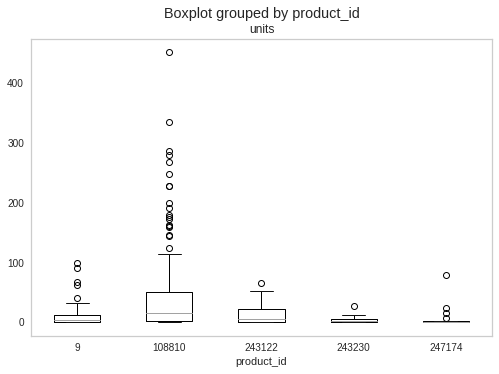

In [ ]:
import seaborn as sns
df.boxplot(by = 'product_id', column = 'units', grid = False)

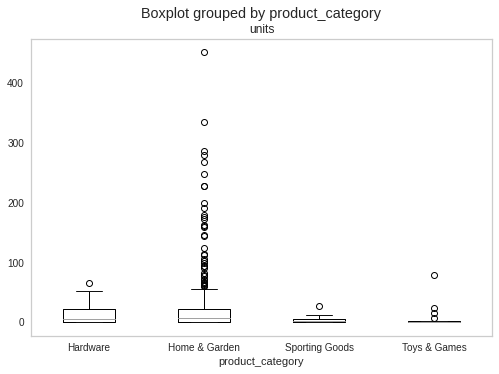

In [ ]:
df.boxplot(by='product_category',column='units',grid= False)

In [ ]:
df.product_id.unique()

array([     9, 108810, 243122, 243230, 247174])

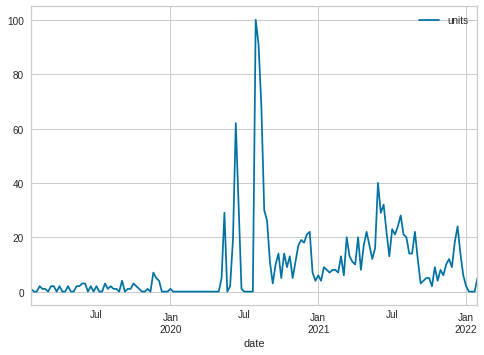

9


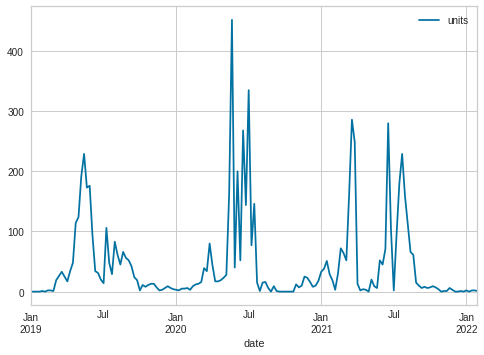

108810


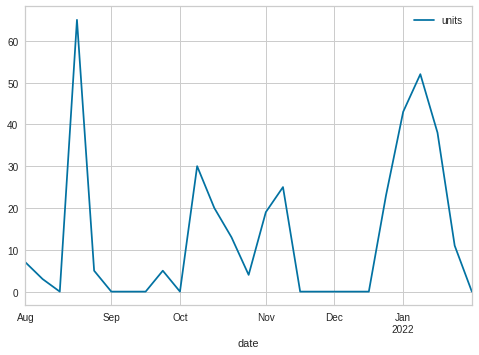

243122


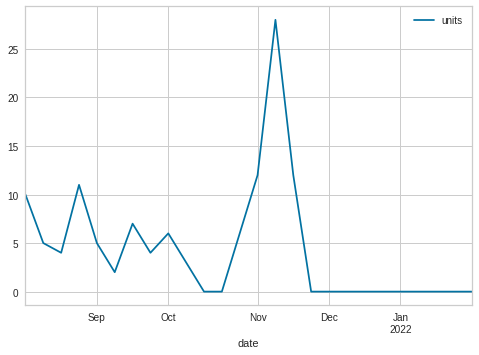

243230


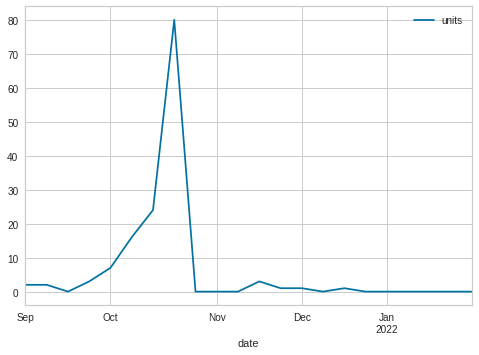

247174


In [ ]:
for n in df.product_id.unique():
  p = df[df['product_id']==n]
  p[['date','units']].plot(x='date',y='units')
  plt.show()
  print(n)

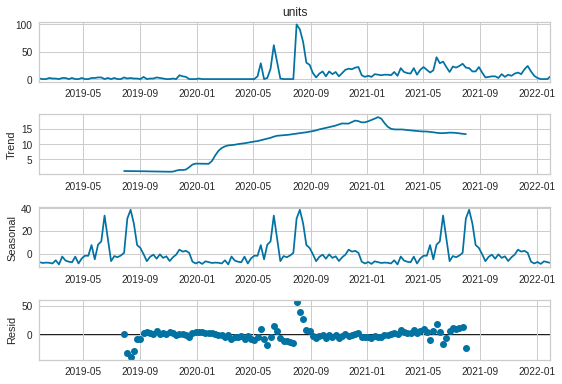

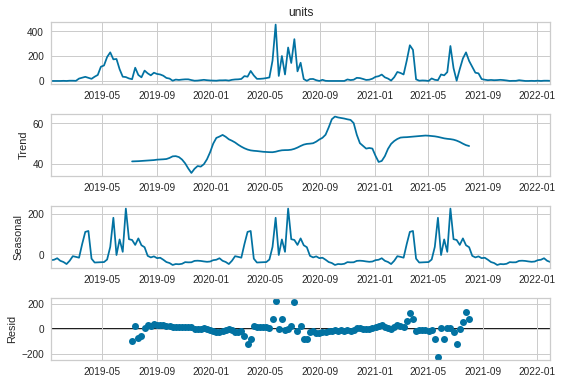

ValueError: ignored

In [ ]:
for n in df.product_id.unique():
  p = df[df['product_id']==n]
  p.index = p['date']
  decomposition = sm.tsa.seasonal_decompose(p['units'], model='additive')
  fig = decomposition.plot()
  plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
for n in df.product_id.unique():
  p = df[df['product_id']==n]
  print(n)
  dftest = adfuller(p['units'], autolag='AIC')
  print("Test statistic = {:.3f}".format(dftest[0]))
  print("P-value = {:.3f}".format(dftest[1]))
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
  print(dftest)

9
Test statistic = -2.702
P-value = 0.074
Test Statistic                  -2.701809
p-value                          0.073726
#Lags Used                       7.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
dtype: float64
Test Statistic                  -2.701809
p-value                          0.073726
#Lags Used                       7.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
dtype: float64
Test Statistic                  -2.701809
p-value                          0.073726
#Lags Used                       7.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64
(-2.701808583904188, 0.07372582758684704, 7, 150, {'1%': -3.474714913481481, '5%': -2.881008708148148, '10%': -2.5771508444444446}, 1076.8186713198613)
10881

In [ ]:
from pmdarima.arima import ADFTest
for n in df.product_id.unique():
  p = df[df['product_id']==n]
  p.index = p['date']
  print(n)
  adf_t = ADFTest(alpha=0.05)
  print(adf_t.should_diff(p['units']))

9
(0.03781236323378158, False)
108810
(0.04042897943404794, False)
243122
(0.13677814431096735, True)
243230
(0.31832986061856605, True)
247174
(0.3358947887302375, True)


In [ ]:
#separate treatment and forecast models for each product
p1 = df[df['product_id']==9]
p2 = df[df['product_id']==108810]
p3 = df[df['product_id']==243122]
p4 = df[df['product_id']==243230]
p5 = df[df['product_id']==247174]
print(p1.head())
print(p5.head())

  snapshot_date product_category  product_id       date  units
0      2/6/2022    Home & Garden           9 2019-01-27      1
1      2/6/2022    Home & Garden           9 2019-02-03      0
2      2/6/2022    Home & Garden           9 2019-02-10      0
3      2/6/2022    Home & Garden           9 2019-02-17      2
4      2/6/2022    Home & Garden           9 2019-02-24      1
    snapshot_date product_category  product_id       date  units
372      2/6/2022     Toys & Games      247174 2021-09-05      2
373      2/6/2022     Toys & Games      247174 2021-09-12      2
374      2/6/2022     Toys & Games      247174 2021-09-19      0
375      2/6/2022     Toys & Games      247174 2021-09-26      3
376      2/6/2022     Toys & Games      247174 2021-10-03      7


In [ ]:
p1_train, p1_test = train_test_split(p1, test_size=0.2, shuffle=False)
p2_train, p2_test = train_test_split(p2, test_size=0.2, shuffle=False)
p3_train, p3_test = train_test_split(p3, test_size=0.2, shuffle=False)
p4_train, p4_test = train_test_split(p4, test_size=0.2, shuffle=False)
p5_train, p5_test = train_test_split(p5, test_size=0.2, shuffle=False)


In [ ]:
from pmdarima.arima import auto_arima
model1 = auto_arima(p1_train['units'], start_p=0, d =1, start_q=0, max_p=5,max_d=5,max_q=5,start_P=0,D=1,start_Q=0,max_D=5,max_Q=5, m=5,seasonal=True,error_action='warn',trace=True,stepwise=True,n_fits=5)  
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=1064.699, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=1032.005, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.89 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=1066.618, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=1005.368, Time=0.53 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=2.30 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=1003.469, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=1030.109, Time=0.06 sec
 ARIMA(0,1,0)(2,1,1)[5]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=1005.299, Time=0.20 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(2,1,0)[5] intercept   : AIC=1005.465, Time=0.25 sec

Best model:  ARIMA(0,1,0)(2,1,0)[5]          
Total fit time: 

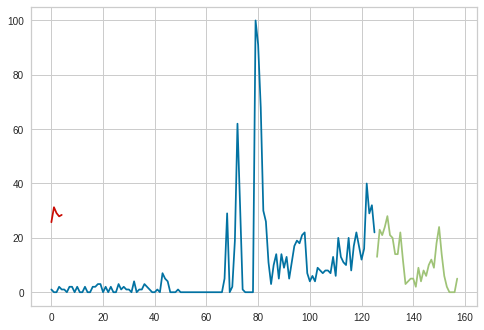

WMAPE: 8.8426
WMAPE: 2.7215


In [ ]:
pred1 = pd.DataFrame(model1.predict(n_periods=5,index=p1_test.index))
plt.plot(p1_train['units'], label="Training")
plt.plot(p1_test['units'], label="Test")
plt.plot(pred1, label="Prediciton")
plt.show()
print('WMAPE: %.4f'% sum(abs(p1_train['units']-model1.predict(n_periods=len(p1_train.index)))/sum(p1_train['units'])))
print('WMAPE: %.4f'% sum(abs(p1_test['units']-model1.predict(n_periods = len(p1_test.index)))/sum(p1_test['units'])))

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=1508.413, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=1427.502, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=1462.224, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=1407.812, Time=0.21 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=1437.880, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=1408.916, Time=0.26 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=1405.850, Time=0.42 sec
 ARIMA(1,1,1)(1,1,0)[5]             : AIC=1426.049, Time=0.16 sec
 ARIMA(1,1,1)(2,1,1)[5]             : AIC=inf, Time=0.70 sec
 ARIMA(1,1,1)(1,1,1)[5]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=1412.026, Time=0.23 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=1406.434, Time=0

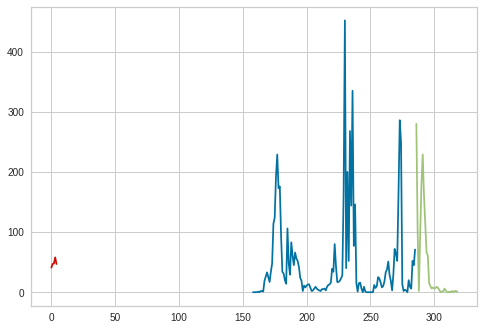

WMAPE: 1.2565
WMAPE: 1.4426


In [ ]:
model2 = auto_arima(p2_train['units'], start_p=0, d =1, start_q=0, max_p=5,max_d=5,max_q=5,start_P=0,D=1,start_Q=0,max_D=5,max_Q=5, m=5,seasonal=True,error_action='warn',trace=True,stepwise=True,n_fits=5)  
print(model2.summary())
pred2 = pd.DataFrame(model2.predict(n_periods=5,index=p2_test.index))
plt.plot(p2_train['units'], label="Training")
plt.plot(p2_test['units'], label="Test")
plt.plot(pred2, label="Prediciton")
plt.show()
print('WMAPE: %.4f'% sum(abs(p2_train['units']-model2.predict(n_periods=len(p2_train.index)))/sum(p2_train['units'])))
print('WMAPE: %.4f'% sum(abs(p2_test['units']-model2.predict(n_periods = len(p2_test.index)))/sum(p2_test['units'])))

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=141.818, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=144.997, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=143.573, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[5]             : AIC=143.138, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=143.080, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[5]             : AIC=inf, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[5]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[5] intercept   : AIC=143.785, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[5]          
Total fit time: 0.610 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   21
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 5)   Log Likelihood 

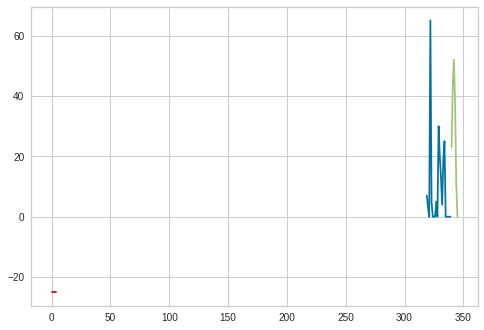

WMAPE: 8.0153
WMAPE: 2.0479


In [ ]:
model3 = auto_arima(p3_train['units'], start_p=0, d =1, start_q=0, max_p=5,max_d=5,max_q=5,start_P=0,D=1,start_Q=0,max_D=5,max_Q=5, m=5,seasonal=True,error_action='warn',trace=True,stepwise=True,n_fits=5)  
print(model3.summary())
pred3 = pd.DataFrame(model3.predict(n_periods=5,index=p3_test.index))
plt.plot(p3_train['units'], label="Training")
plt.plot(p3_test['units'], label="Test")
plt.plot(pred3, label="Prediciton")
plt.show()
print('WMAPE: %.4f'% sum(abs(p3_train['units']-model3.predict(n_periods=len(p3_train.index)))/sum(p3_train['units'])))
print('WMAPE: %.4f'% sum(abs(p3_test['units']-model3.predict(n_periods = len(p3_test.index)))/sum(p3_test['units'])))

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=104.750, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=107.117, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=105.133, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[5]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=106.480, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[5]             : AIC=106.504, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[5]             : AIC=108.471, Time=0.04 sec
 ARIMA(0,1,0)(0,1,0)[5] intercept   : AIC=106.429, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[5]          
Total fit time: 0.611 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   20
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 5)   Log Likelih

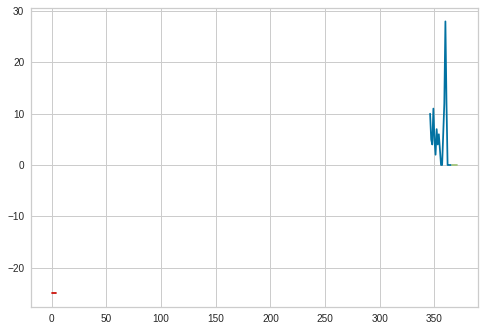

WMAPE: 12.7565
WMAPE: inf


In [ ]:
model4 = auto_arima(p4_train['units'], start_p=0, d =1, start_q=0, max_p=5,max_d=5,max_q=5,start_P=0,D=1,start_Q=0,max_D=5,max_Q=5, m=5,seasonal=True,error_action='warn',trace=True,stepwise=True,n_fits=5)  
print(model4.summary())
pred4 = pd.DataFrame(model3.predict(n_periods=5,index=p4_test.index))
plt.plot(p4_train['units'], label="Training")
plt.plot(p4_test['units'], label="Test")
plt.plot(pred4, label="Prediciton")
plt.show()
print('WMAPE: %.4f'% sum(abs(p4_train['units']-model4.predict(n_periods=len(p4_train.index)))/sum(p4_train['units'])))
print('WMAPE: %.4f'% sum(abs(p4_test['units']-model4.predict(n_periods = len(p4_test.index)))/sum(p4_test['units'])))

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=115.899, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[5]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=115.994, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[5]             : AIC=115.278, Time=0.04 sec
 ARIMA(0,1,1)(1,1,0)[5]             : AIC=95.360, Time=0.15 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=96.798, Time=0.24 sec
 ARIMA(0,1,1)(1,1,1)[5]             : AIC=96.798, Time=0.23 sec
 ARIMA(0,1,1)(2,1,1)[5]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,1)(1,1,0)[5]             : AIC=93.830, Time=0.35 sec
 ARIMA(1,1,1)(0,1,0)[5]             : AIC=inf, Time=0.08 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,1)(1,1,

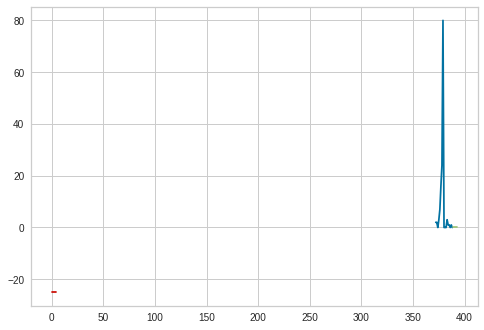

WMAPE: 8.8817
WMAPE: inf


In [ ]:
model5 = auto_arima(p5_train['units'], start_p=0, d =1, start_q=0, max_p=5,max_d=5,max_q=5,start_P=0,D=1,start_Q=0,max_D=5,max_Q=5, m=5,seasonal=True,error_action='warn',trace=True,stepwise=True,n_fits=5)  
print(model5.summary())
pred5 = pd.DataFrame(model3.predict(n_periods=5,index=p5_test.index))
plt.plot(p5_train['units'], label="Training")
plt.plot(p5_test['units'], label="Test")
plt.plot(pred5, label="Prediciton")
plt.show()
print('WMAPE: %.4f'% sum(abs(p5_train['units']-model5.predict(n_periods=len(p5_train.index)))/sum(p5_train['units'])))
print('WMAPE: %.4f'% sum(abs(p5_test['units']-model5.predict(n_periods = len(p5_test.index)))/sum(p5_test['units'])))

In [ ]:
!pip install tensorflow
!pip install folium
!pip install pycaret-ts-alpha

     |████████████████████████████████| 462 kB 4.1 MB/s 


In [ ]:
from pycaret.time_series import *
s1 = setup(pd.Series(p1_train, index = p1_train['date']).asfreq('w'), session_id = 123)
s2 = setup(pd.Series(p2_train, index = p2_train['date']).asfreq('w'), session_id = 123)
s3 = setup(pd.Series(p3_train, index = p3_train['date']).asfreq('w'), session_id = 123)
s4 = setup(pd.Series(p4_train, index = p4_train['date']).asfreq('w'), session_id = 123)
s5 = setup(pd.Series(p5_train, index = p5_train['date']).asfreq('w'), session_id = 123)
checkstats()

ValueError: ignored